In [1]:
from datetime import datetime
import numpy as np
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
warnings.filterwarnings('ignore')

In [103]:
data=pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\IntelliPaat\EDA CSV files\TAMO Historical Data.csv")
data.head(15)

# Data for Tata Motors was downloaded from monecontrol.com on 11 Nov 2024. 

,Date,Price
0,11/11/24,804.7
1,8/11/24,805.45
2,7/11/24,819.75
3,6/11/24,839.7
4,5/11/24,835.65
5,4/11/24,824.1
6,1/11/24,843.45
7,31-10-2024,834.05
8,30-10-2024,840.2
9,29-10-2024,842.75


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    958 non-null    object
 1   Price   958 non-null    object
dtypes: object(2)
memory usage: 15.1+ KB


In [105]:
data['Date']=data['Date'].str.replace('/','-')

In [106]:
data.head(20)

,Date,Price
0,11-11-24,804.7
1,8-11-24,805.45
2,7-11-24,819.75
3,6-11-24,839.7
4,5-11-24,835.65
5,4-11-24,824.1
6,1-11-24,843.45
7,31-10-2024,834.05
8,30-10-2024,840.2
9,29-10-2024,842.75


In [108]:
data['Date']= data['Date'].apply(lambda x: datetime.strptime(x, "%d-%m-%y") if len(x)<=8 else datetime.strptime(x, "%d-%m-%Y"))

In [109]:
data['Date']=pd.to_datetime(data['Date'])
data

,Date,Price
0,2024-11-11,804.7
1,2024-11-08,805.45
2,2024-11-07,819.75
3,2024-11-06,839.7
4,2024-11-05,835.65
...,...,...
953,2021-01-07,196.75
954,2021-01-06,195.4
955,2021-01-05,193.2
956,2021-01-04,191.3


In [110]:
data['month']=data['Date'].dt.month

In [111]:
data.head(20)

,Date,Price,month
0,2024-11-11,804.7,11
1,2024-11-08,805.45,11
2,2024-11-07,819.75,11
3,2024-11-06,839.7,11
4,2024-11-05,835.65,11
5,2024-11-04,824.1,11
6,2024-11-01,843.45,11
7,2024-10-31,834.05,10
8,2024-10-30,840.2,10
9,2024-10-29,842.75,10


In [112]:
data.drop(columns=['month'])

,Date,Price
0,2024-11-11,804.7
1,2024-11-08,805.45
2,2024-11-07,819.75
3,2024-11-06,839.7
4,2024-11-05,835.65
...,...,...
953,2021-01-07,196.75
954,2021-01-06,195.4
955,2021-01-05,193.2
956,2021-01-04,191.3


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    958 non-null    datetime64[ns]
 1   Price   958 non-null    object        
 2   month   958 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 22.6+ KB


In [114]:
data['Price']=data['Price'].str.replace(',','').astype(float)

In [115]:
data['Price']=pd.to_numeric(data['Price'])

In [116]:
data.iloc[43,:]

Date     2024-09-10 00:00:00
Price                 1035.8
month                      9
Name: 43, dtype: object

In [117]:
data.sample(5)

,Date,Price,month
903,2021-03-22,303.05,3
813,2021-08-03,303.70,8
156,2024-03-26,983.17,3
596,2022-06-17,388.95,6
689,2022-02-01,504.30,2


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    958 non-null    datetime64[ns]
 1   Price   958 non-null    float64       
 2   month   958 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 22.6 KB


In [119]:
data=data.set_index('Date')
data.sample(3)

,Price,month
Date,,
2022-09-23,421.80,9
2023-07-21,623.83,7
2022-06-03,431.90,6


In [120]:
data.index.name = None

In [121]:
data.sample(3)

,Price,month
2024-03-20,937.56,3
2024-08-21,1085.20,8
2021-04-13,302.85,4


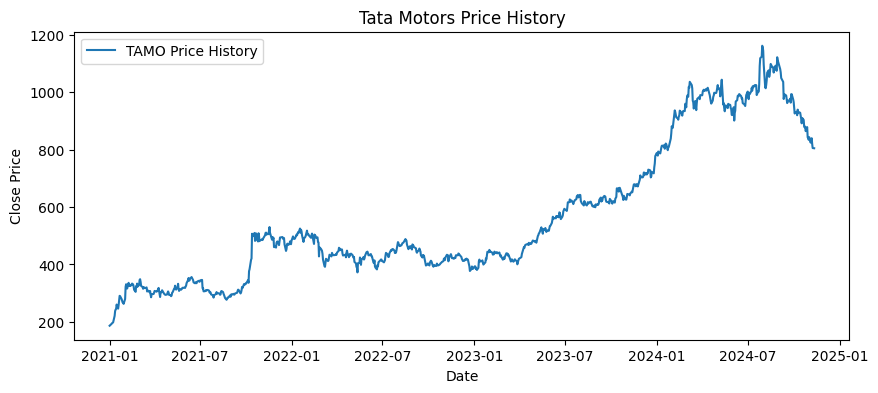

In [122]:
plt.figure(figsize=(10,4))
sns.lineplot(data=data, x=data.index,y= data['Price'], label='TAMO Price History')
plt.title('Tata Motors Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()

In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)

In [124]:
sequence_length=60
X_train, y_train=[],[]
for i in range(sequence_length, len(scaled_data)):
    X_train.append(scaled_data[i-sequence_length:i,0])
    y_train.append(scaled_data[i,0])

X_train, y_train=np.array(X_train), np.array(y_train)


In [125]:
X_train

array([[0.63382376, 0.63459271, 0.64925411, ..., 0.92141283, 0.92315579,
        0.92397601],
       [0.63459271, 0.64925411, 0.66970831, ..., 0.92315579, 0.92397601,
        0.93489517],
       [0.64925411, 0.66970831, 0.66555595, ..., 0.92397601, 0.93489517,
        0.89798534],
       ...,
       [0.12154611, 0.12431435, 0.11821397, ..., 0.01194443, 0.01050905,
        0.00912493],
       [0.12431435, 0.11821397, 0.11334393, ..., 0.01050905, 0.00912493,
        0.00686933],
       [0.11821397, 0.11334393, 0.1126775 , ..., 0.00912493, 0.00686933,
        0.00492131]])

In [126]:
X_train.shape

(898, 60)

In [127]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.633824,0.634593,0.649254,0.669708,0.665556,0.653714,0.673553,0.663916,0.670221,0.672835,...,0.948224,0.958784,0.910494,0.913262,0.928795,0.921362,0.904240,0.921413,0.923156,0.923976
1,0.634593,0.649254,0.669708,0.665556,0.653714,0.673553,0.663916,0.670221,0.672835,0.709438,...,0.958784,0.910494,0.913262,0.928795,0.921362,0.904240,0.921413,0.923156,0.923976,0.934895
2,0.649254,0.669708,0.665556,0.653714,0.673553,0.663916,0.670221,0.672835,0.709438,0.694930,...,0.910494,0.913262,0.928795,0.921362,0.904240,0.921413,0.923156,0.923976,0.934895,0.897985
3,0.669708,0.665556,0.653714,0.673553,0.663916,0.670221,0.672835,0.709438,0.694930,0.711027,...,0.913262,0.928795,0.921362,0.904240,0.921413,0.923156,0.923976,0.934895,0.897985,0.888860
4,0.665556,0.653714,0.673553,0.663916,0.670221,0.672835,0.709438,0.694930,0.711027,0.708617,...,0.928795,0.921362,0.904240,0.921413,0.923156,0.923976,0.934895,0.897985,0.888860,0.912134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,0.124366,0.124314,0.121546,0.124314,0.118214,0.113344,0.112678,0.101553,0.110678,0.123956,...,0.106731,0.090634,0.073973,0.060952,0.075665,0.060081,0.057518,0.052597,0.035013,0.011944
894,0.124314,0.121546,0.124314,0.118214,0.113344,0.112678,0.101553,0.110678,0.123956,0.119496,...,0.090634,0.073973,0.060952,0.075665,0.060081,0.057518,0.052597,0.035013,0.011944,0.010509
895,0.121546,0.124314,0.118214,0.113344,0.112678,0.101553,0.110678,0.123956,0.119496,0.125545,...,0.073973,0.060952,0.075665,0.060081,0.057518,0.052597,0.035013,0.011944,0.010509,0.009125
896,0.124314,0.118214,0.113344,0.112678,0.101553,0.110678,0.123956,0.119496,0.125545,0.123545,...,0.060952,0.075665,0.060081,0.057518,0.052597,0.035013,0.011944,0.010509,0.009125,0.006869


In [128]:
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# we reshaped the X_train and Y_train to 3dimensional array- because RNN and LSTM needs a 3d input

In [129]:
X_train

array([[[0.63382376],
        [0.63459271],
        [0.64925411],
        ...,
        [0.92141283],
        [0.92315579],
        [0.92397601]],

       [[0.63459271],
        [0.64925411],
        [0.66970831],
        ...,
        [0.92315579],
        [0.92397601],
        [0.93489517]],

       [[0.64925411],
        [0.66970831],
        [0.66555595],
        ...,
        [0.92397601],
        [0.93489517],
        [0.89798534]],

       ...,

       [[0.12154611],
        [0.12431435],
        [0.11821397],
        ...,
        [0.01194443],
        [0.01050905],
        [0.00912493]],

       [[0.12431435],
        [0.11821397],
        [0.11334393],
        ...,
        [0.01050905],
        [0.00912493],
        [0.00686933]],

       [[0.11821397],
        [0.11334393],
        [0.1126775 ],
        ...,
        [0.00912493],
        [0.00686933],
        [0.00492131]]])

In [130]:
X_train.shape

(898, 60, 1)

In [131]:
y_train

array([0.93489517, 0.89798534, 0.88886041, 0.91213411, 0.90388066,
       0.87686472, 0.85999897, 0.84815707, 0.85092531, 0.9331522 ,
       0.98210899, 0.99466858, 1.        , 0.96119342, 0.95534936,
       0.92730815, 0.86245963, 0.83590506, 0.83728918, 0.82380684,
       0.85923002, 0.85574409, 0.85912749, 0.85123289, 0.85538525,
       0.83969857, 0.8493874 , 0.83672528, 0.82754908, 0.83221408,
       0.80909417, 0.81488696, 0.83616138, 0.82355052, 0.80545445,
       0.78469267, 0.78792228, 0.79104937, 0.79489414, 0.81175988,
       0.81083714, 0.81960322, 0.82729277, 0.81955196, 0.82247398,
       0.82083355, 0.80550572, 0.8007587 , 0.76778592, 0.75930692,
       0.73268058, 0.7802635 , 0.75220177, 0.75317578, 0.77326088,
       0.77730046, 0.78848618, 0.79057774, 0.79242323, 0.77724919,
       0.78112472, 0.78684575, 0.7754037 , 0.76589942, 0.77704414,
       0.79477111, 0.78976778, 0.87858717, 0.86187522, 0.84327677,
       0.81920336, 0.84745989, 0.84459937, 0.85932229, 0.83898

In [132]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [133]:
model=Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))


In [134]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 60, 50)            2600      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 8951 (34.96 KB)
Trainable params: 8951 (34.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [135]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history= model.fit(X_train, y_train, epochs=5, batch_size=1, verbose=True)

Epoch 1/5
898/898 [==============================] - 89s 86ms/step - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 2/5
898/898 [==============================] - 62s 69ms/step - loss: 9.1033e-04 - mean_squared_error: 9.1033e-04
Epoch 3/5
898/898 [==============================] - 55s 61ms/step - loss: 4.7784e-04 - mean_squared_error: 4.7784e-04
Epoch 4/5
898/898 [==============================] - 54s 61ms/step - loss: 4.9953e-04 - mean_squared_error: 4.9953e-04
Epoch 5/5
898/898 [==============================] - 66s 73ms/step - loss: 4.2586e-04 - mean_squared_error: 4.2586e-04


In [136]:
test_data=scaled_data[-(sequence_length+40):,:]
X_test, y_test=[], data['Price'][-40:].values

for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i-sequence_length:i,0])

X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [29]:
test_data.shape

(100, 1)

In [30]:
X_test.shape

(40, 60, 1)

In [31]:
y_test.shape

(40,)

In [32]:
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 34ms/step


In [33]:
predictions=predictions.reshape(-1)

In [34]:
y_test[-40:]

array([322.95, 333.15, 321.65, 324.  , 304.5 , 311.85, 323.85, 330.15,
       329.2 , 333.35, 325.4 , 325.  , 328.9 , 325.05, 335.95, 315.9 ,
       326.15, 331.  , 322.  , 279.6 , 262.7 , 266.8 , 267.5 , 279.15,
       289.35, 290.6 , 274.9 , 258.65, 245.95, 260.3 , 245.1 , 242.6 ,
       237.8 , 220.65, 198.15, 196.75, 195.4 , 193.2 , 191.3 , 186.5 ])

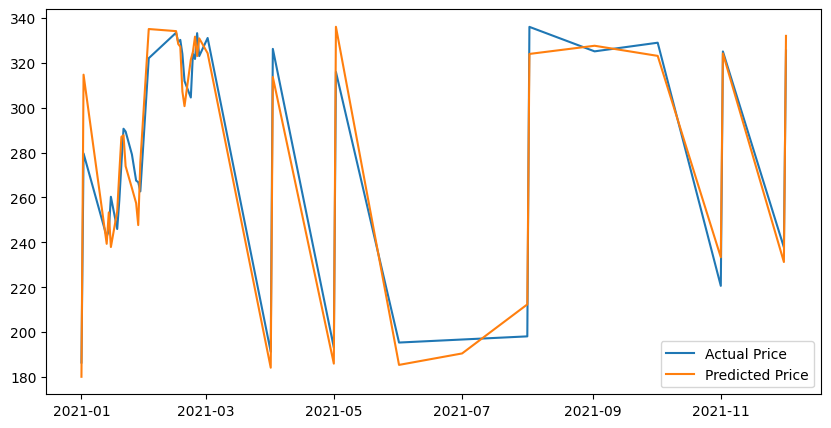

In [35]:
plt.figure(figsize=(10,5))
train_len=len(y_train)
sns.lineplot( x=data.index[-40:], y=y_test, label='Actual Price')
sns.lineplot( x=data.index[-40:], y=predictions, label='Predicted Price')
plt.legend()
plt.show()

In [36]:
rmse=np.sqrt(np.mean(y_test-predictions.squeeze())**2)
print(rmse)

0.4368500518798804


In [40]:
test_data.shape

(100, 1)

In [41]:
last_60_days = scaled_data[-60:]

In [42]:
last_60_days = last_60_days.reshape((1, 60, 1))

In [43]:
predicted_price_scaled = model.predict(last_60_days)

1/1 [==============================] - 0s 78ms/step


In [44]:
predicted_price = scaler.inverse_transform(predicted_price_scaled)

In [45]:
print("Predicted stock price for tomorrow:", predicted_price[0][0])

Predicted stock price for tomorrow: 176.68973
